In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Sara\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Sara\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Sara\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Sara\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.

In [2]:
x_data=np.linspace(0.0,10.0,1000000)
noise=np.random.randn(len(x_data))

In [3]:
# y=mx+b  where b=5

In [4]:
y_true=(0.5*x_data) + 5 + noise

In [5]:
x_df=pd.DataFrame(data=x_data,columns=["X-Data"])
y_df=pd.DataFrame(data=y_true,columns=["Y"])

In [6]:
my_data=pd.concat([x_df,y_df],axis=1)
my_data.head()

,X-Data,Y
0,0.00000,4.567896
1,0.00001,5.479913
2,0.00002,5.130746
3,0.00003,5.021465
4,0.00004,6.135427


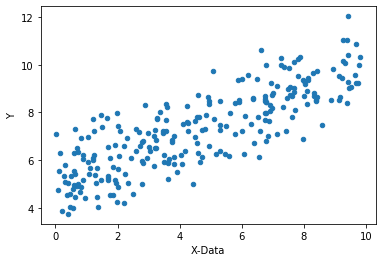

In [7]:
my_data.sample(n=250).plot(kind="scatter",x="X-Data",y="Y")

In [8]:
batch_size=8
m=tf.Variable(0.5)
b=tf.Variable(1.0)
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])

In [9]:
#Model
y_model=m*xph + b

In [10]:
#Cost Function
error=tf.reduce_sum(tf.square(yph-y_model))

In [11]:
#Gradient Descent
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)

In [12]:
init=tf.global_variables_initializer()

In [13]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
    model_m, model_b = sess.run([m,b])

In [14]:
model_m

0.5121762

In [15]:
model_b

4.973939

In [16]:
y_pred=x_data*model_m +model_b

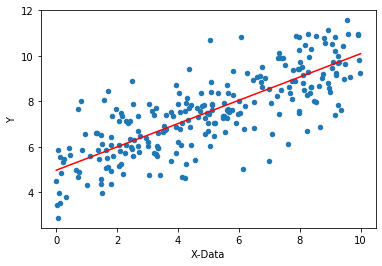

In [17]:
my_data.sample(n=250).plot(kind = 'scatter',x='X-Data', y = 'Y')
plt.plot(x_data,y_pred,'r')

In [18]:
#Estimator API
feat_cols=[tf.feature_column.numeric_column("x",shape=[1])]
estimator=tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Sara\\AppData\\Local\\Temp\\tmpypnl7lkp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000008D6966B38>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [19]:
#Train_Test_Split
from sklearn.model_selection import train_test_split 

In [22]:
x_train,x_eval,y_train,y_eval=train_test_split(x_data,y_true,test_size=0.3,random_state=0)

In [26]:
input_func=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [29]:
train_input_func=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [30]:
eval_input_func=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [25]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Sara\AppData\Local\Temp\tmpypnl7lkp\model.ckpt.
INFO:tensorflow:loss = 202.4541, step = 1
INFO:tensorflow:global_step/sec: 186.555
INFO:tensorflow:loss = 19.551332, step = 101 (0.548 sec)
INFO:tensorflow:global_step/sec: 290.678
INFO:tensorflow:loss = 1.9958866, step = 201 (0.344 sec)
INFO:tensorflow:global_step/sec: 316.434
INFO:tensorflow:loss = 16.332628, step = 301 (0.316 sec)
INFO:tensorflow:global_step/sec: 319.09
INFO:tensorflow:loss = 10.877689, step = 401 (0.309 sec)
INFO:tensorflow:global_step/sec: 297.6
INFO:tensorflow:loss = 8.975344, step = 501 (0.340 sec)
INFO:tensorflow:global_step/sec: 312.472
INFO:tensorflow:loss = 1.9501797, step = 601 (0.320 sec)
INFO:tensorflow:global_step/sec: 3

In [31]:
train_matrics=estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-18-16:01:58
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Sara\AppData\Local\Temp\tmpypnl7lkp\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-04-18-16:02:02
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1281375, global_step = 1000, label/mean = 7.5436325, loss = 4.51255, prediction/mean = 7.42271
INFO:tensorflow:Saving 'checkpoint_path' su

In [32]:
eval_matrics=estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-18-16:02:54
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Sara\AppData\Local\Temp\tmpypnl7lkp\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-04-18-16:02:58
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1281375, global_step = 1000, label/mean = 7.5436325, loss = 4.51255, prediction/mean = 7.42271
INFO:tensorflow:Saving 'checkpoint_path' su

In [33]:
input_func_predict=tf.estimator.inputs.numpy_input_fn({"x":np.linspace(0,10,10)},shuffle=False)

In [34]:
list(estimator.predict(input_fn=input_func_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Sara\AppData\Local\Temp\tmpypnl7lkp\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.3455033], dtype=float32)},
 {'predictions': array([5.0237246], dtype=float32)},
 {'predictions': array([5.7019453], dtype=float32)},
 {'predictions': array([6.380166], dtype=float32)},
 {'predictions': array([7.0583878], dtype=float32)},
 {'predictions': array([7.736608], dtype=float32)},
 {'predictions': array([8.414829], dtype=float32)},
 {'predictions': array([9.09305], dtype=float32)},
 {'predictions': array([9.771272], dtype=float32)},
 {'predictions': array([10.4494915], dtype=float32)}]

In [36]:
predictions=[]
for x in estimator.predict(input_fn=input_func_predict):
    predictions.append(x["predictions"])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Sara\AppData\Local\Temp\tmpypnl7lkp\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


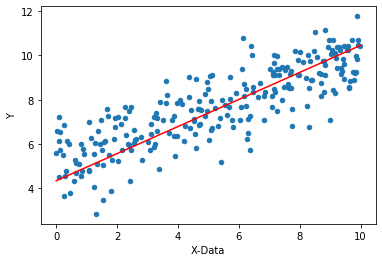

In [37]:
my_data.sample(n=250).plot(kind = 'scatter',x='X-Data', y = 'Y')
plt.plot(np.linspace(0,10,10),predictions,"r")